![logo](../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# CMIP6 Climate Projections: evaluating uncertainty in projected changes of energy consumption in Europe at a 2°C Global Warming Level. 

## Use case: Assessing possible impacts of climate change on energy demand in Europe

## Quality assessment question
* **What are the projected changes for a global warming level of 2°C and associated uncertainties of Energy Degree Days in Europe?**

Production date: 23-05-2024

Produced by: CMCC foundation - Euro-Mediterranean Center on Climate Change. Albert Martinez Boti.

Sectors affected by climate change are varied including agriculture [[1]](https://doi.org/10.1007/s10113-010-0173-x), forest ecosystems [[2]](https://doi.org/10.1016/j.foreco.2009.09.023), and energy consumption [[3]](https://doi.org/10.1016/j.enbuild.2014.09.052). Under projected future global warming over Europe [[4]](https://doi.org/10.1007/s10113-013-0499-2)[[5]](https://epic.awi.de/id/eprint/37530/), the current increase in energy demand is expected to persist until the end of this century and beyond [[6]](https://doi.org/10.1002/joc.5362). Identifying which climate-change-related impacts are likely to increase, by how much, and inherent regional patterns, is important for any effective strategy for managing future climate risks. This notebook utilises data from a subset of models from CMIP6 Global Climate Models (GCMs) and explores the projected changes and uncertainties in future projections of energy-consumption-related indices by considering the ensemble inter-model spread of a subset of CMIP6 models at a global mean warming level of 2°C. Two energy-consumption-related indices are calculated from daily mean temperatures using the [icclim](https://icclim.readthedocs.io/en/stable/) Python package: Cooling Degree Days (CDDs) and Heating Degree Days (HDDs). Degree days measure how much warmer or colder it is compared to standard temperatures (usually 15.5°C for heating and 22°C for cooling). Higher degree day numbers indicate more extreme temperatures, which typically lead to increased energy use for heating or cooling buildings. In the presented code, CDD calculations use summer aggregation (CDD22), while HDD calculations focus on winter (HDD15.5), presenting results as daily averages rather than cumulative values. In this notebook, these calculations are performed over the historical period from 1971 to 2000 and compared to the global warming level of 2°C. The global warming level of 2°C can be defined as the first time the 30-year moving average (centre year) of global temperature is above 2°C compared to pre-industrial (Grigory Nikulin et al. (2018) [[7]](https://dx.doi.org/10.1088/1748-9326/aab1b1)). The preindustrial period is defined here as the period spanning from 1861 to 1890 and the index calculations are performed for the Shared Socioeconomic Pathways SSP5-8.5. It is important to note that the results presented here pertain to a specific subset of the CMIP6 ensemble and may not be generalisable to the entire dataset. Also note that a separate assessment examines the representation of climatology and trends of these indices for the same models during the historical period (1971-2000), while another assessment looks at the projected trends of these indices for the same models during a fixed future period (2015-2099).

## Quality assessment statement

* Under a 2°C global warming scenario, projections indicate further changes in Energy Degree Days for the selected subset of models. 

* HDD15.5 is projected to decrease across Europe for DJF, with the largest decreases expected in northern and continental Europe. Conversely, CDD22 is expected to increase, with the Mediterranean Basin experiencing the most significant rise.

* Despite a clear agreement on the sign of the climate signal for the selected models, differences on the magnitude of the climate signal between models is high and larger ensemble should be considered when addressing specific cases to enhance the robustness of the analysis and account for uncertainties.

* The projected decrease in Heating Degree Days during winter and the projected increase in Cooling Degree Days during summer in a world 2°C warmer than the preindustrial baseline provide valuable information for decisions sensitive to future energy demand. Using climate global warming levels instead of fixed future periods helps mitigate the systematic biases of the models [[8]](https://doi.org/10.5194/esd-13-321-2022). However, it is important to note that the centered thirty-year period when the global mean temperature reaches 2°C above the preindustrial baseline varies depending on the model considered, making it challenging to determine this timing. Users must identify whether their interest lies in projected values for fixed periods or in working with global warming levels. A combined approach may provide a more comprehensive assessment.

```{image} 1b204289-a2d7-4cee-bad9-d5f270df7baf.png 
:alt: GWL_CDD22.png
:width: 550px

<div>
    <div style="max-width: 600px;">
    <p><strong>Fig A.</strong> Boxplot illustrating the climate signal (i.e., the mean values for the warming level of 2°C compared to the historical period from 1971 to 2000) for the ensemble distribution of the 'CDD22' index daily averaged. The distribution is created by considering spatially averaged values across Europe. The ensemble mean and the ensemble median are both included. Outliers in the distribution are denoted by a grey circle with a black contour.</p>
</div>

## Methodology

The reference methodology used here for the indices calculation is similar to the one followed by Scoccimarro et al., (2023) [[9]](https://doi.org/10.1038/s43247-023-00878-3). However the thermal comfort thresholds used in this notebook are slightly different. A winter comfort temperature of 15.5°C and a summer comfort temperature of 22.0°C are used here (as in the [CDS application](https://datastore.copernicus-climate.eu/documents/app-heating-cooling-degree-days/C3S_EEA_HDD_CDD_application_user_guide_v0.9.pdf)). In the presented code, the CDD calculations are based on the JJA aggregation, with a comfort temperature of 22°C (CDD22), while HDD calculations focus on winter (DJF) with a comfort temperature of 15.5°C (HDD15.5). More specifically, to calculate CDD22, the sum of the differences between the daily mean temperature and the thermal comfort temperature of 22°C is computed. This calculation occurs only when the mean temperature is above the thermal comfort level; otherwise, the CDD22 for that day is set to 0. For example, a day with a mean temperature of 28°C would result in 6°C. Two consecutive hot days like this would total 12°C over the two-day period. Similarly, to calculate HDD15.5, the sum of the differences between the thermal comfort temperature of 15.5°C and the daily mean temperature is determined. This happens only when the mean temperature is below the thermal comfort level; otherwise, the HDD15.5 for that day is set to 0. Finally, to obtain more intuitive values, the sum is averaged over the number of days in the season to produce daily average values. This approach differs from the [CDS application](https://datastore.copernicus-climate.eu/documents/app-heating-cooling-degree-days/C3S_EEA_HDD_CDD_application_user_guide_v0.9.pdf), where both the sum over a period and the daily average values can be displayed.  In Spinoni et al., (2018) [[6]](https://doi.org/10.1002/joc.5362), as well as in the [CDS application](https://datastore.copernicus-climate.eu/documents/app-heating-cooling-degree-days/C3S_EEA_HDD_CDD_application_user_guide_v0.9.pdf), more advanced methods for calculating CDD and HDD involve considering maximum, minimum, and mean temperatures. However, to prevent overloading the notebook and maintain simplicity while ensuring compatibility with the [icclim](https://icclim.readthedocs.io/en/stable/) Python package, we opted to utilise a single variable (2m mean temperature).


This notebook provides an assessment of the projected changes and their associated uncertainties, utilising a subset of 16 models from [CMIP6](https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=overview) under a global warming level of 2°C. The uncertainty is explored by analysing the ensemble inter-model spread of projected changes the energy-consumption-related indices 'HDD15.5' and 'CDD22', calculated for the specific global warming level of 2°C. In particular, spatial patterns of the climate signal (i.e., mean values for the warming level of 2°C compared to the historical period from 1971 to 2000) are examined and displayed for each model individually and for the ensemble median (calculated for each grid cell), alongside the ensemble inter-model spread to account for projected uncertainty. Additionally, spatially-averaged values are analysed and presented using box plots to provide an overview of climate signal behavior across the distribution of the chosen subset of models when averaged across Europe.

The analysis and results follow the next outline:

**[](climate_projections-cmip6_climate-impact-indicators_q03:section-1)**
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-1.1)
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-1.2)
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-1.3)
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-1.4)
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-1.5)
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-1.6)

**[](climate_projections-cmip6_climate-impact-indicators_q03:section-2)**
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-2.1)
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-2.2)
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-2.3)

**[3. Plot and describe results](climate_projections-cmip6_climate-impact-indicators_q03:section-3)**
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-3.1)
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-3.2)
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-3.3)
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-3.4)
 * [](climate_projections-cmip6_climate-impact-indicators_q03:section-3.5)

## Analysis and results

(climate_projections-cmip6_climate-impact-indicators_q03:section-1)=
### 1. Parameters, requests and functions definition

(climate_projections-cmip6_climate-impact-indicators_q03:section-1.1)=
#### 1.1. Import packages

In [1]:
import math
import tempfile
import warnings
import textwrap
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import icclim
import matplotlib.pyplot as plt
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils
from xarrayMannKendall import Mann_Kendall_test

plt.style.use("seaborn-v0_8-notebook")
plt.rcParams["hatch.linewidth"] = 0.5

(climate_projections-cmip6_climate-impact-indicators_q03:section-1.2)=
#### 1.2. Define Parameters

In the "Define Parameters" section, various customisable options for the notebook are specified. Most of the parameters chosen are the same as those used in other assessments ([](./climate_projections-cmip6_climate-impact-indicators_q01)), being them:

- `historical_slice` determines the historical (or control) period used (1971 to 2000 is choosen)
- `index_timeseries` is a dictionary that set the temporal aggregation for every index considered within this notebook ('HDD15.5' and 'CDD22'). In the presented code, the CDD calculations are always based on the JJA aggregation, with a comfort temperature of 22°C (CDD22), while HDD calculations focus on winter (DJF) with a comfort temperature of 15.5°C (HDD15.5).
- `collection_id` set the family of models. Only CMIP6 is implemented for this sub-notebook.
- `area` allows specifying the geographical domain of interest.
- The `interpolation_method` parameter allows selecting the interpolation method when regridding is performed over the indices.
- The `chunk` selection allows the user to define if dividing into chunks when downloading the data on their local machine. Although it does not significantly affect the analysis, it is recommended to keep the default value for optimal performance.

In [2]:
# Time period
historical_slice = slice(1971, 2000)

# Choose annual or seasonal timeseries
index_timeseries = {
    "HDD15.5": "DJF",
    "CDD22": "JJA",
}
if "annual" in index_timeseries.values():
    assert set(index_timeseries.values()) == {"annual"}

# Select the family of models 
collection_id = "CMIP6"
assert collection_id in ("CMIP6")

# Interpolation method
interpolation_method = "bilinear"

# Area to show
area = [72, -22, 27, 45]

# Chunks for download
chunks = {"year": 1}

(climate_projections-cmip6_climate-impact-indicators_q03:section-1.3)=
#### 1.3. Define models

The following climate analyses are performed considering a subset of GCMs from CMIP6. Models names are listed in the parameters below. The selected CMIP6 models have available both the historical and SSP8.5 experiments, and are the same as those used in other assessments ([](./climate_projections-cmip6_climate-impact-indicators_q01)). Additionally, for each model, the thirty-year period corresponding to the Global Warming Level of 2°C above the preindustrial period is specified.

The Global Warming Level of 2°C can be defined as the earliest point at which a 30-year moving average of global temperature exceeds by two degrees compared to the 1861–1890 baseline [[6]](https://dx.doi.org/10.1088/1748-9326/aab1b1). This thirty-year period varies depending on the Global Climate Model being analysed. To determine this timeframe, the global mean surface temperature for the preindustrial baseline is first calculated for each model. Then, a rolling mean over 30 years is applied to the future period from 2015 to 2099, following the SSP5-8.5 scenario. Finally, the earliest 30-year period at which each model reaches the global warming level of 2°C above the preindustrial period is identified.

<a id='NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>NOTE on the 30-year slice used for Global Warming Level calculations</b>:<br> 
Given the 30-year duration of the historical/control period, the period of mean global surface temperature reaching 2 degrees above preindustrial levels was defined as a 30-year interval (while some studies use 20-year slices for this purpose). The pre-industrial period was also calculated as a 30-year slice (as done in <a href=\"https://dx.doi.org/10.1088/1748-9326/aab1b1"> [6]</a>), despite the standard practice of considering the period from 1850 to 1900. This approach not only saves computational time but also ensures consistency in working with 30-year slices.

<a id='NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>NOTE on the Global Warming Level calculation</b>:<br> 
To streamline the current notebook and avoid excessive length and complexity, the calculation of the Global Warming Level of 2°C above the preindustrial period for each model has been conducted externally.

In [3]:
# Define models
models_cmip6 = {
            "access_cm2": slice(2022, 2051),
            "awi_cm_1_1_mr": slice(2021, 2050),
            "cmcc_esm2": slice(2024, 2053),
            "cnrm_cm6_1_hr": slice(2016, 2045),
            "cnrm_esm2_1": slice(2031, 2060),
            "ec_earth3_cc": slice(2019, 2048),
            "gfdl_esm4": slice(2037, 2066),
            "inm_cm4_8": slice(2030,2059),
            "inm_cm5_0": slice(2031, 2060),
            "kiost_esm": slice(2022,2051),
            "miroc6": slice(2039, 2068),
            "miroc_es2l": slice(2033,2062),
            "mpi_esm1_2_lr": slice(2034, 2063),
            "mri_esm2_0": slice(2023,2052),
            "noresm2_mm": slice(2040,2069),
            "nesm3": slice(2018,2047),
}
model_regrid = "gfdl_esm4"

# Colormaps
cmaps_trends = {"HDD15.5": "Reds_r", "CDD22": "Reds"}

#Define dictionaries to use in titles and caption
long_name = {
    "HDD15.5":"Heating Degree Days daily average calculated using the winter comfort threshold of 15.5°C" , 
    "CDD22":"Cooling Degree Days daily average calculated using the summer comfort threshold of 22°C",
}

(climate_projections-cmip6_climate-impact-indicators_q03:section-1.4)=
#### 1.4. Define land-sea mask request

Within this sub-notebook, ERA5 will be used to download the land-sea mask when plotting. In this section, we set the required parameters for the cds-api data-request of ERA5 land-sea mask.

In [4]:
request_lsm = (
    "reanalysis-era5-single-levels",
    {
        "product_type": "reanalysis",
        "format": "netcdf",
        "time": "00:00",
        "variable": "land_sea_mask",
        "year": "1940",
        "month": "01",
        "day": "01",
        "area": area,
    },
)

(climate_projections-cmip6_climate-impact-indicators_q03:section-1.5)=
#### 1.5. Define model requests

In this section we set the required parameters for the cds-api data-request.

When `Weights = True`, spatial weighting is applied for calculations requiring spatial data aggregation. This is particularly relevant for CMIP6 GCMs with regular lon-lat grids that do not consider varying surface extensions at different latitudes. In contrast, CORDEX RCMs, using rotated grids, inherently account for different cell surfaces based on latitude, eliminating the need for a latitude cosine multiplicative factor (`Weights = False`).

In [5]:
request_cmip6 = {
    "format": "zip",
    "temporal_resolution": "daily",
    "variable": "near_surface_air_temperature",
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "area": area,
}

model_requests = {}
for model, future_slice in models_cmip6.items():
    requests_historical = download.split_request(
        request_cmip6
        | {
            "year": [
                str(year)
                for year in range(historical_slice.start - 1, historical_slice.stop + 1)
            ],
            "experiment": "historical",
            "model": model,
        },
        chunks=chunks,
    )
    requests_future = download.split_request(
        request_cmip6
        | {
            "year": [
                str(year)
                for year in range(future_slice.start - 1, future_slice.stop + 1)
            ],
            "experiment": "ssp5_8_5",
            "model": model,
        },
        chunks=chunks,
    )
    model_requests[model] = (
        "projections-cmip6",
        requests_historical + requests_future,
    )

request_grid_out = model_requests[model_regrid]

(climate_projections-cmip6_climate-impact-indicators_q03:section-1.6)=
#### 1.6. Functions to cache

In this section, functions that will be executed in the caching phase are defined. Caching is the process of storing copies of files in a temporary storage location, so that they can be accessed more quickly. This process also checks if the user has already downloaded a file, avoiding redundant downloads.

Functions description:

- The `select_timeseries` function subsets the dataset based on the chosen `timeseries` parameter, which could be a specific season (e.g., "JJA") or "annual.

- The `compute_indices` function utilises the icclim package to calculate the energy-consumption-related indices.

- Finally, the `compute_indices_and_trends` function calculates the energy consumption-related indices for the corresponding temporal aggregation using the  `compute_indices` function and determines the indices mean over the period of interest.

In [6]:
def select_timeseries(ds, index_timeseries, year_slice):
    year_start = year_slice.start
    year_stop = year_slice.stop

    timeseries = set(index_timeseries.values())
    if timeseries == {"annual"}:
        return ds.sel(time=slice(str(year_start), str(year_stop)))
    assert "annual" not in timeseries
    return ds.sel(time=slice(f"{year_start-1}-12", f"{year_stop}-11"))


def compute_indices(
    ds,
    index_timeseries,
    tmpdir,
    historical_slice,
    future_slice,
):
    labels, datasets = zip(*ds.groupby("time.year"))
    paths = [f"{tmpdir}/{label}.nc" for label in labels]
    datasets = [ds.chunk(-1) for ds in datasets]
    xr.save_mfdataset(datasets, paths)

    ds = xr.open_mfdataset(paths)
    in_files = f"{tmpdir}/rechunked.zarr"
    chunks = {dim: -1 if dim == "time" else "auto" for dim in ds.dims}
    ds.chunk(chunks).to_zarr(in_files)

    future_range = (f"{future_slice.start}-01-01", f"{future_slice.stop}-12-31")
    historical_range = (
        f"{historical_slice.start}-01-01",
        f"{historical_slice.stop}-12-31",
    )

    dataarrays = []
    for index_name, timeseries in index_timeseries.items():
        kwargs = {
            "in_files": in_files,
            "slice_mode": "year" if timeseries == "annual" else timeseries,
        }
        if index_name == "HDD15.5":
            func = icclim.index
            kwargs |= {
                "index_name": "deficit",
                "threshold": icclim.build_threshold("15.5 degC"),
            }
        elif index_name == "CDD22":
            func = icclim.excess
            kwargs |= {"threshold": icclim.build_threshold("22 degC")}
        else:
            raise NotImplementedError(f"{index_name=}")

        ds_historical = func(
            out_file=f"{tmpdir}/{index_name}_historical.nc",
            time_range=historical_range,
            **kwargs,
        )
        ds_future = func(
            out_file=f"{tmpdir}/{index_name}_future.nc",
            time_range=future_range,
            **kwargs,
        )
        with xr.set_options(keep_attrs=True):
            ds_index = ds_future.mean("time") - ds_historical.mean("time")

        (da,) = ds_index.drop_dims("bounds").data_vars.values()
        num_days = {"DJF": 90, "MAM": 92, "JJA": 92, "SON": 91}
        with xr.set_options(keep_attrs=True):
            da /= (
                num_days[timeseries]
                if timeseries != "annual"
                else sum(num_days.values())
            )
        da.attrs["units"] = da.attrs["units"].replace(" d", "")
        dataarrays.append(da.rename(index_name))
    return xr.merge(dataarrays)


def add_bounds(ds):
    for coord in {"latitude", "longitude"} - set(ds.cf.bounds):
        ds = ds.cf.add_bounds(coord)
    return ds


def get_grid_out(request_grid_out, method):
    ds_regrid = download.download_and_transform(*request_grid_out)
    coords = ["latitude", "longitude"]
    if method == "conservative":
        ds_regrid = add_bounds(ds_regrid)
        for coord in list(coords):
            coords.extend(ds_regrid.cf.bounds[coord])
    grid_out = ds_regrid[coords]
    coords_to_drop = set(grid_out.coords) - set(coords) - set(grid_out.dims)
    grid_out = ds_regrid[coords].reset_coords(coords_to_drop, drop=True)
    grid_out.attrs = {}
    return grid_out


def compute_indices_future_vs_historical(
    ds,
    index_timeseries,
    historical_slice,
    future_slice,
    resample_reduction=None,
    request_grid_out=None,
    **regrid_kwargs,
):
    assert (request_grid_out and regrid_kwargs) or not (
        request_grid_out or regrid_kwargs
    )
    ds = ds.drop_vars([var for var, da in ds.data_vars.items() if len(da.dims) != 3])
    ds = ds[list(ds.data_vars)]

    # Original bounds for conservative interpolation
    if regrid_kwargs.get("method") == "conservative":
        ds = add_bounds(ds)
        bounds = [
            ds.cf.get_bounds(coord).reset_coords(drop=True)
            for coord in ("latitude", "longitude")
        ]
    else:
        bounds = []

    ds_historical = select_timeseries(ds, index_timeseries, historical_slice)
    ds_future = select_timeseries(ds, index_timeseries, future_slice)
    ds = xr.concat([ds_historical, ds_future], "time")
    if resample_reduction:
        resampled = ds.resample(time="1D")
        ds = getattr(resampled, resample_reduction)(keep_attrs=True)
        if resample_reduction == "sum":
            for da in ds.data_vars.values():
                da.attrs["units"] = f"{da.attrs['units']} / day"
    with tempfile.TemporaryDirectory() as tmpdir:
        ds = compute_indices(
            ds, index_timeseries, tmpdir, historical_slice, future_slice
        ).compute()
        if request_grid_out:
            ds = diagnostics.regrid(
                ds.merge({da.name: da for da in bounds}),
                grid_out=get_grid_out(request_grid_out, regrid_kwargs["method"]),
                **regrid_kwargs,
            )
        return ds

(climate_projections-cmip6_climate-impact-indicators_q03:section-2)=
### 2. Downloading and processing

(climate_projections-cmip6_climate-impact-indicators_q03:section-2.1)=
#### 2.1. Download and transform the regridding model

In this section, the `download.download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package is employed to download daily data from the selected CMIP6 regridding model, compute the energy-consumption-related indices for the selected temporal aggregation ("DJF" for HDD and "JJA" for CDD), calculate the mean over the historical period (1971-2000) and for the thirty-year period corresponding to the 2°C warming level, and cache the result (to avoid redundant downloads and processing). 

The regridding model is intended here as the model whose grid will be used to interpolate the others. This ensures all models share a common grid, facilitating the calculation of median values for each cell point. The regridding model within this notebook is "gfdl_esm4" but a different one can be selected by just modifying the `model_regrid` parameter at [](climate_projections-cmip6_climate-impact-indicators_q03:section-1.3). It is key to highlight the importance of the chosen target grid depending on the specific application.

<a id='NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>NOTE on the Global Warming Level calculation</b>:<br> 
The thirty year-period corresponding to the 2°C Global Warming Level is different for each model. Its calculation has been conducted externally.

In [7]:
transform_func_kwargs = {
    "index_timeseries": dict(sorted(index_timeseries.items())),
    "historical_slice": historical_slice,
}
model_kwargs = {
    "chunks": chunks,
    "transform_chunks": False,
    "transform_func": compute_indices_future_vs_historical,
}
ds_regrid = download.download_and_transform(
    *request_grid_out,
    **model_kwargs,
    transform_func_kwargs=transform_func_kwargs
    | {"future_slice": models_cmip6[model_regrid]},
)

(climate_projections-cmip6_climate-impact-indicators_q03:section-2.2)=
#### 2.2. Download and transform models

In this section, we utilise the `download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package to download daily data from the CMIP6 models for the historical period (1971-2000) and for the thirty-year period corresponding to the 2°C warming level of each model, compute the energy-consumption-related indices for the selected temporal aggregation ("DJF" for HDD and "JJA" for CDD), calculate the mean over the historical period (1971-2000) and for the thirty-year period corresponding to the 2°C warming level, interpolate to the regridding model's grid (only for the cases in which it is specified, in the other cases, the original model's grid is mantained), and cache the result (to avoid redundant downloads and processing).

<a id='NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>NOTE on the Global Warming Level calculation</b>:<br> 
The thirty year-period corresponding to the 2°C Global Warming Level is different for each model. Its calculation has been conducted externally.

In [8]:
interpolated_datasets = []
model_datasets = {}
for model, requests in model_requests.items():
    print(f"{model=}")
    # Original model
    ds = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs
        | {"future_slice": models_cmip6[model]},
    )
    model_datasets[model] = ds

    # Interpolated model
    ds = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs
        | {
            "future_slice": models_cmip6[model],
            "request_grid_out": request_grid_out,
            "method": interpolation_method,
            "skipna": True,
        },
    )
    interpolated_datasets.append(ds.expand_dims(model=[model]))

ds_interpolated = xr.concat(interpolated_datasets, "model",coords='minimal',compat='override')

model='access_cm2'
model='awi_cm_1_1_mr'
model='cmcc_esm2'
model='cnrm_cm6_1_hr'
model='cnrm_esm2_1'
model='ec_earth3_cc'
model='gfdl_esm4'
model='inm_cm4_8'
model='inm_cm5_0'
model='kiost_esm'
model='miroc6'
model='miroc_es2l'
model='mpi_esm1_2_lr'
model='mri_esm2_0'
model='noresm2_mm'
model='nesm3'


(climate_projections-cmip6_climate-impact-indicators_q03:section-2.3)=
#### 2.3. Apply land-sea mask, change attributes and cut the region to show

This section performs the following tasks:

1. Cut the region of interest.
2. Downloads the sea mask for ERA5.
3. Regrids ERA5's mask to the `model_regrid` grid and applies it to the regridded data
4. Regrids the ERA5 land-sea mask to the model's original grid and applies it to them.
5. Change some variable attributes for plotting purposes.

**Note:** `ds_interpolated` contains data from the models regridded to the regridding model's grid. `model_datasets` contain the same data but in the original grid of each model.

In [9]:
lsm = download.download_and_transform(*request_lsm)["lsm"].squeeze(drop=True)

# Cutout
regionalise_kwargs = {
    "lon_slice": slice(area[1], area[3]),
    "lat_slice": slice(area[0], area[2]),
}
lsm = utils.regionalise(lsm, **regionalise_kwargs)
ds_interpolated = utils.regionalise(ds_interpolated, **regionalise_kwargs)
model_datasets = {
    model: utils.regionalise(ds, **regionalise_kwargs)
    for model, ds in model_datasets.items()
}

# Mask
ds_interpolated = ds_interpolated.where(
    diagnostics.regrid(lsm, ds_interpolated, method="bilinear")
)
model_datasets = {
    model: ds.where(diagnostics.regrid(lsm, ds, method="bilinear"))
    for model, ds in model_datasets.items()
}

# Edit attributes
for ds in (ds_interpolated, *model_datasets.values()):
    for index in index_timeseries:
        ds[index].attrs = {"long_name": "", "units": "°C" if ds[index].attrs["units"]=="K"
                                else (ds[index].attrs["units"])}

(climate_projections-cmip6_climate-impact-indicators_q03:section-3)=
### 3. Plot and describe results

This section will display the following results:

- Maps representing the spatial distribution of the climate change signal (i.e., mean values for the warming level of 2°C compared to the historical period 1971-2000) of the indices 'HDD15.5' and 'CDD22' for each model individually, the ensemble median (understood as the median of the climate signal values of the chosen subset of models calculated for each grid cell), and the ensemble spread (derived as the standard deviation of the distribution of the chosen subset of models).
  
- Boxplots representing statistical distributions (PDFs) constructed from the spatially-averaged climate signal of each considered model.

(climate_projections-cmip6_climate-impact-indicators_q03:section-3.1)=
#### 3.1. Define plotting functions

The functions presented here are used to plot the climate signal (i.e., mean values for the warming level of 2°C compared to the historical period) for each of the indices ('HDD15.5' and 'CDD22').

For a selected index, two layout types will be displayed, depending on the chosen function:

1. Layout including the ensemble median and the ensemble spread: `plot_ensemble()` is used.
2. Layout including every model: `plot_models()` is employed.

In [10]:
#Define function to plot the caption of the figures (for the ensmble case)
def add_caption_ensemble(index):
    #Add caption to the figure
    caption_text = (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggregation of '{index_timeseries[index]}'. The layout displays "
                f"the climate signal of '{index}', i.e., the difference between the mean values of '{index}' "
                f"for the 30-year period corresponding to the 2°C warming level and the mean values for the "
                f"historical period (1971-2000). " 
                f"The layout includes data corresponding to: (a) the ensemble median (understood as the median "
                f"of the climate signal values of the chosen subset of models " 
                f"calculated for each grid cell) and (b) the ensemble spread "
                f"(derived as the standard deviation of the distribution of the chosen " 
                f"subset of models)."
            ) 
    wrapped_lines = textwrap.wrap(caption_text, width=105)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)
    #end captioning


#Define function to plot the cation of the figures (for the individual models case)
def add_caption_models(index):
    #Add caption to the figure
    caption_text = (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggregation of "
                f"'{index_timeseries[index]}'. The layout displays, for each {collection_id} model,  "
                f"the climate signal of '{index}', i.e., the difference between the mean values of '{index}' "
                f"for the 30-year period corresponding to the 2°C warming level and the mean values "
                f"for the historical period (1971-2000)"
            )
    
    wrapped_lines = textwrap.wrap(caption_text, width=120)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)



def hatch_p_value(da, ax, **kwargs):
    default_kwargs = {
        "plot_func": "contourf",
        "show_stats": False,
        "cmap": "none",
        "add_colorbar": False,
        "levels": [0, 0.05, 1],
        "hatches": ["", "/" * 3],
    }
    kwargs = default_kwargs | kwargs

    title = ax.get_title()
    plot_obj = plot.projected_map(da, ax=ax, **kwargs)
    ax.set_title(title)
    return plot_obj


def hatch_p_value_ensemble(trend, p_value, ax):
    n_models = trend.sizes["model"]
    robust_ratio = (p_value <= 0.05).sum("model") / n_models
    robust_ratio = robust_ratio.where(p_value.notnull().any("model"))
    signs = xr.concat([(trend > 0).sum("model"), (trend < 0).sum("model")], "sign")
    sign_ratio = signs.max("sign") / n_models
    robust_threshold = 0.66
    sign_ratio = sign_ratio.where(robust_ratio > robust_threshold)
    for da, threshold, character in zip(
        [robust_ratio, sign_ratio], [robust_threshold, 0.8], ["/", "\\"]
    ):
        hatch_p_value(da, ax=ax, levels=[0, threshold, 1], hatches=[character * 3, ""])


def set_extent(da, axs, area):
    extent = [area[i] for i in (1, 3, 2, 0)]
    for i, coord in enumerate(extent):
        extent[i] += -1 if i % 2 else +1
    for ax in axs:
        ax.set_extent(extent)


def plot_models(
    data,
    da_for_kwargs=None,
    p_values=None,
    col_wrap=4,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    area=area,
    **kwargs,
):
    if isinstance(data, dict):
        assert da_for_kwargs is not None
        model_dataarrays = data
    else:
        da_for_kwargs = da_for_kwargs or data
        model_dataarrays = dict(data.groupby("model"))

    if p_values is not None:
        model_p_dataarrays = (
            p_values if isinstance(p_values, dict) else dict(p_values.groupby("model"))
        )
    else:
        model_p_dataarrays = None

    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(da_for_kwargs.values, **kwargs)

    fig, axs = plt.subplots(
        *(col_wrap, math.ceil(len(model_dataarrays) / col_wrap)),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    for (model, da), ax in zip(model_dataarrays.items(), axs):
        pcm = plot.projected_map(
            da, ax=ax, show_stats=False, add_colorbar=False, **kwargs
        )
        ax.set_title(model)
        if model_p_dataarrays is not None:
            hatch_p_value(model_p_dataarrays[model], ax)
    set_extent(da_for_kwargs, axs, area)
    fig.colorbar(
        pcm,
        ax=axs.flatten(),
        extend=kwargs["extend"],
        location="right",
        label=f"{da_for_kwargs.attrs.get('long_name', '')} [{da_for_kwargs.attrs.get('units', '')}]",
    )
    return fig


def plot_ensemble(
    da_models,
    da_era5=None,
    p_value_era5=None,
    p_value_models=None,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    cbar_kwargs=None,
    area=area,
    cmap_bias=None,
    cmap_std=None,
    **kwargs,
):
    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(
        da_models.values if da_era5 is None else da_era5.values, **kwargs
    )
    if da_era5 is None and cbar_kwargs is None:
        cbar_kwargs = {"orientation": "horizontal"}

    # Figure
    fig, axs = plt.subplots(
        *(1 if da_era5 is None else 2, 2),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    axs_iter = iter(axs)

    # ERA5
    if da_era5 is not None:
        ax = next(axs_iter)
        plot.projected_map(
            da_era5, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
        )
        if p_value_era5 is not None:
            hatch_p_value(p_value_era5, ax=ax)
        ax.set_title("(a) ERA5")

    # Median
    ax = next(axs_iter)
    median = da_models.median("model", keep_attrs=True)
    plot.projected_map(
        median, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
    )
    if p_value_models is not None:
        hatch_p_value_ensemble(trend=da_models, p_value=p_value_models, ax=ax)
    ax.set_title("(b) Ensemble Median" if da_era5 is not None else "(a) Ensemble Median")

    # Bias
    if da_era5 is not None:
        ax = next(axs_iter)
        with xr.set_options(keep_attrs=True):
            bias = median - da_era5
        plot.projected_map(
            bias,
            ax=ax,
            show_stats=False,
            center=0,
            cbar_kwargs=cbar_kwargs,
            **(default_kwargs | {"cmap": cmap_bias}),
        )
        ax.set_title("(c) Ensemble Median Bias")

    # Std
    ax = next(axs_iter)
    std = da_models.std("model", keep_attrs=True)
    plot.projected_map(
        std,
        ax=ax,
        show_stats=False,
        cbar_kwargs=cbar_kwargs,
        **(default_kwargs | {"cmap": cmap_std}),
    )
    ax.set_title("(d) Ensemble Standard Deviation" if da_era5 is not None else "(b) Ensemble Standard Deviation")

    set_extent(da_models, axs, area)
    return fig

<a id='INITIAL NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>COLORBAR NOTE</b>:<br> 
The colorbar chosen to represent the climate signal for the HDD15.5 index spans from intense to light red. In this color scheme, large negative climate signal values (shown in more intense reds) indicate a significant decrease in Heating Degree Days compared to the historical period. Conversely, lighter red colors indicate a less pronounced decrease in Heating Degree Days compared to the historical period values. This selection is based on the rationale that more Heating Degree Days are associated with colder conditions, typically represented by blueish colors, while fewer Heating Degree Days are associated with warmer conditions, depicted by reddish colors.

(climate_projections-cmip6_climate-impact-indicators_q03:section-3.2)=
#### 3.2. Plot ensemble maps

In this section, we invoke the `plot_ensemble()` function to visualise the climate signal (i.e., mean values for the warming level of 2°C compared to the historical period) for each of the indices ('HDD15.5' and 'CDD22') across Europe.  The layout includes: (a) the ensemble median (understood as the median of the climate signal values of the chosen subset of models calculated for each grid cell) and (b) the ensemble spread (derived as the standard deviation of the distribution of the chosen subset of models).

Note that the model data used in this section has previously been interpolated to the "regridding model" grid (`"gfdl_esm4"` for this notebook).

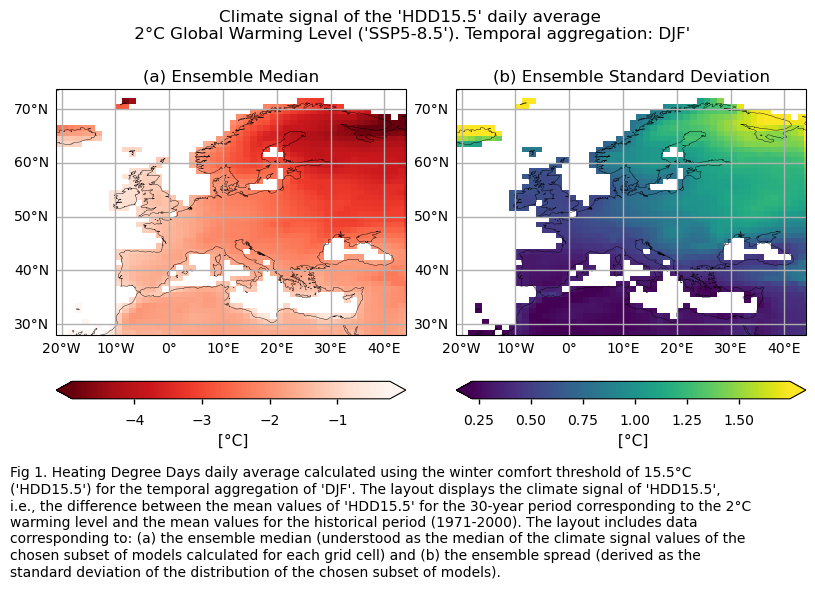

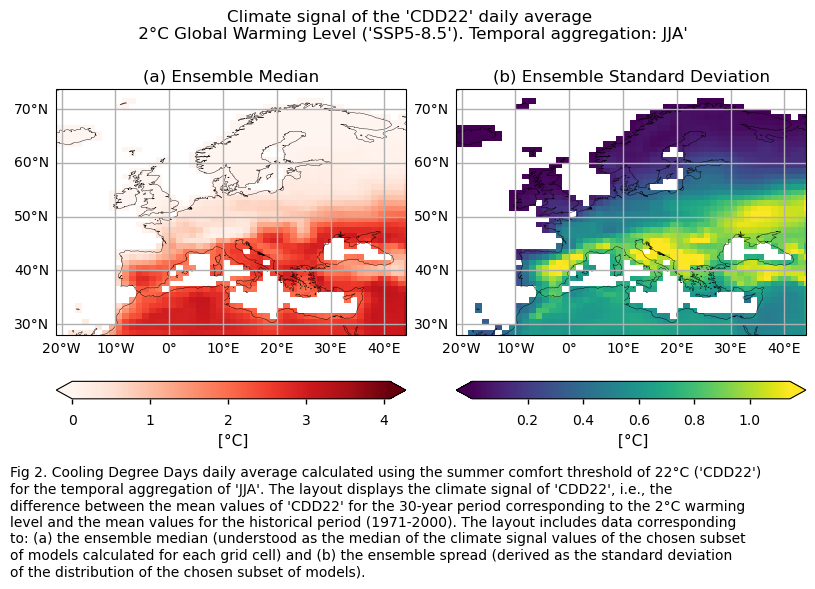

In [11]:
#Fig number counter
fig_number=1

#Common title
common_title = f"2°C Global Warming Level ('SSP5-8.5'). Temporal aggregation:"


for index in index_timeseries:
    # Index
    da = ds_interpolated[index]
    fig = plot_ensemble(
        da_models=da,
        cmap=cmaps_trends.get(index),
    )
    fig.suptitle(f"Climate signal of the '{index}' daily average\n {common_title} {index_timeseries[index]}'",y=0.8)
    add_caption_ensemble(index=index)
    plt.show()
    fig_number=fig_number+1
    print(f"\n")

(climate_projections-cmip6_climate-impact-indicators_q03:section-3.3)=
#### 3.3. Plot model maps

In this section, we invoke the `plot_models()` function to visualise the climate signal for every model individually across Europe. Note that the model data used in this section maintains its original grid.

Specifically, for each of the indices ('HDD15.5' and CDD22'), this section presents a single layout including the climate signal of every model.

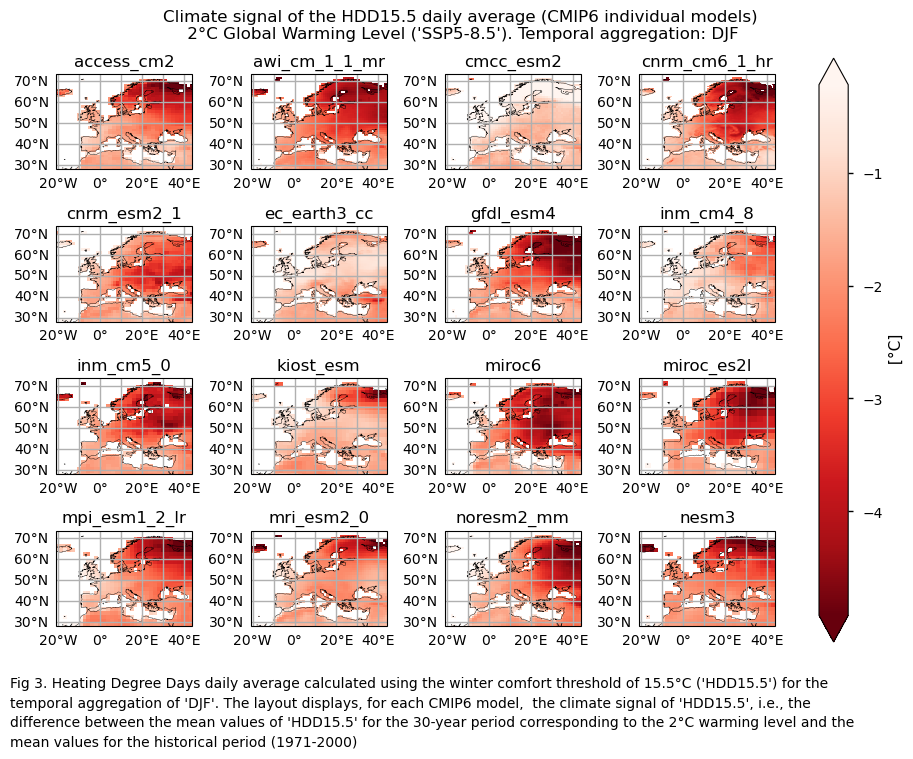

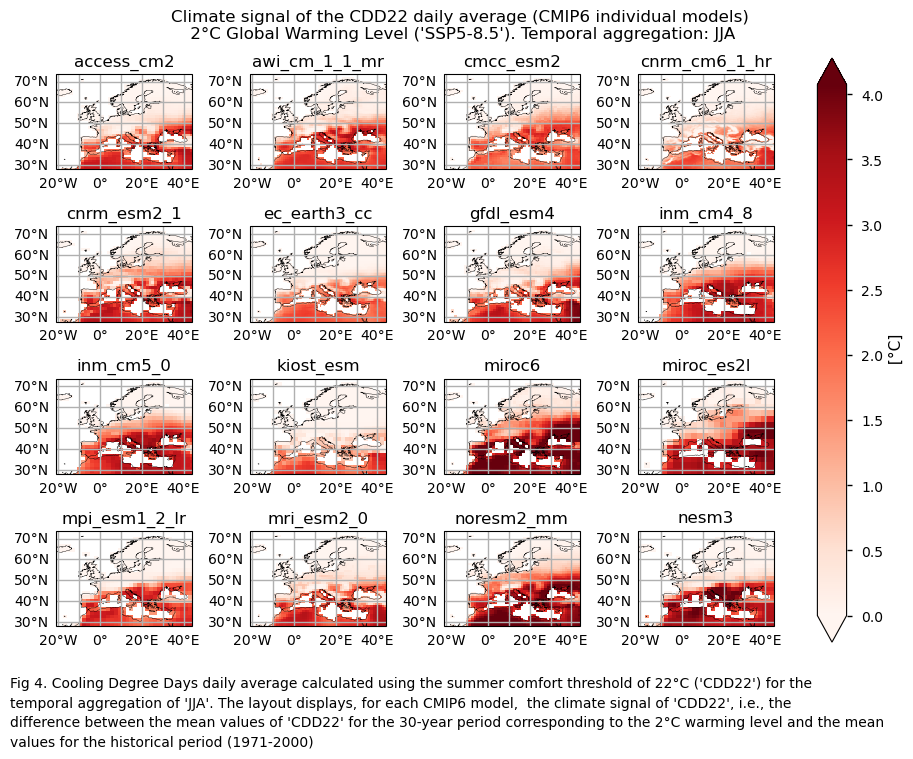

In [12]:
for index in index_timeseries:
    # Index
    da_for_kwargs = ds_interpolated[index]
    fig = plot_models(
        data={model: ds[index] for model, ds in model_datasets.items()},
        da_for_kwargs=da_for_kwargs,
        figsize=[9,6.5],
        cmap=cmaps_trends.get(index),
    )
    fig.suptitle(f"Climate signal of the {index} daily average ({collection_id} individual models)\n {common_title} {index_timeseries[index]}")
    add_caption_models(index=index)
    plt.show()
    print(f"\n")
    fig_number=fig_number+1


(climate_projections-cmip6_climate-impact-indicators_q03:section-3.4)=
#### 3.4. Boxplots of the climate change signal

Finally, we present boxplots representing the ensemble distribution of each climate model signal for the 2°C global warming level.

Dots represent the spatially-averaged climate signal over the selected region for each model (grey) and the ensemble mean (blue). The ensemble median is shown as a green line. Note that the spatially averaged values are calculated for each model from its original grid (i.e., no interpolated data has been used here).

The boxplot visually illustrates the distribution of the climate signal among the climate models, with the box covering the first quartile (Q1 = 25th percentile) to the third quartile (Q3 = 75th percentile), and a green line indicating the ensemble median (Q2 = 50th percentile). Whiskers extend from the edges of the box to show the full data range.

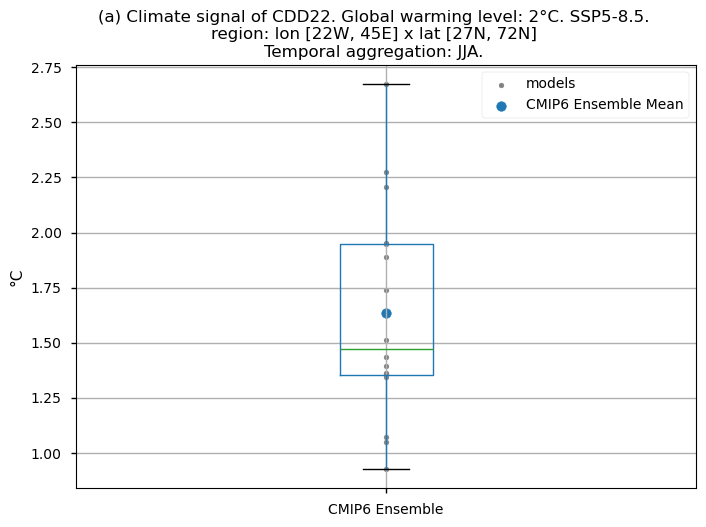

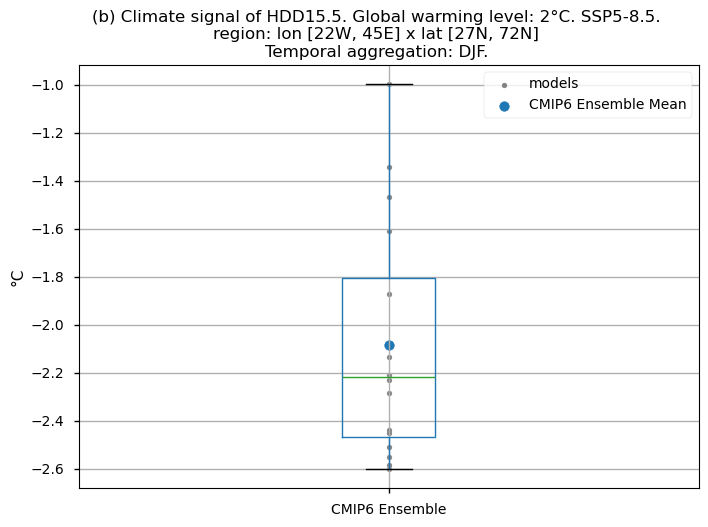

In [13]:
weights = True
mean_datasets = [
    diagnostics.spatial_weighted_mean(ds.expand_dims(model=[model]), weights=weights)
    for model, ds in model_datasets.items()
]
mean_ds = xr.concat(mean_datasets, "model",coords='minimal',compat='override')
index_str=1
for index, da in mean_ds.data_vars.items():
    df_slope = da.to_dataframe()[[index]]
    ax = df_slope.boxplot()
    ax.scatter(
        x=[1] * len(df_slope),
        y=df_slope,
        color="grey",
        marker=".",
        label="models",
    )

    # Ensemble mean
    ax.scatter(
        x=1,
        y=da.mean("model"),
        marker="o",
        label="CMIP6 Ensemble Mean",
    )

    labels = ["CMIP6 Ensemble"]
    ax.set_xticks(range(1, len(labels) + 1), labels)
    ax.set_ylabel(da.attrs["units"])
    plt.suptitle(
            f"({chr(ord('`')+index_str)}) Climate signal of {index}. Global warming level: 2°C. SSP5-8.5. \n"
            f"region: lon [{-area[1]}W, {area[3]}E] x lat [{area[2]}N, {area[0]}N] \n"
            f"Temporal aggregation: {index_timeseries[index]}. "
        ) 
    plt.legend()
    plt.show()
    index_str=index_str+1

<div>
    <div style="max-width: 800px;">
    <p><strong>Fig 5.</strong> Boxplots illustrating the climate signal (i.e., mean values for the warming level of 2°C compared to the historical period from 1971 to 2000) of the distribution of the chosen subset of models for the Energy Degree Days indices daily averaged: (a) 'CDD22', and (b) 'HDD15.5'. The distribution is created by considering spatially averaged values across Europe. The ensemble mean and the ensemble median are both included. Outliers in the distribution are denoted by a grey circle with a black contour.<p>
</div>

(climate_projections-cmip6_climate-impact-indicators_q03:section-3.5)=
#### 3.5. Results summary and discussion

- The Heating Degree Days (HDD15.5) during the DJF season (i.e., the sum of the differences between the thermal comfort temperature of 15.5°C and the daily mean temperature, only when the mean temperature is below the thermal comfort temperature) are projected to generally decrease in a world 2°C warmer than the preindustrial baseline (1861-1890), compared to the average daily values typical of the control period (1971-2000) across Europe. The largest decrease is expected in the northern parts of Europe and continental Europe.

- The Cooling Degree Days (CDD22) during the JJA season (i.e., the sum of the differences between the daily mean temperature and the thermal comfort temperature of 22°C, only when the mean temperature is above the thermal comfort temperature) are projected to generally increase in a world 2°C warmer than the preindustrial baseline (1861-1890), compared to the average daily values typical of the control period (1971-2000) across Europe. The largest increase is expected in the Mediterranean Basin, while northern Europe will experience a lower increase, possibly because exceeding a mean temperature of 22°C in those regions may not be too frequent even in a world 2°C warmer than the preindustrial era.

- Boxplots indicate that, across the considered region, the Heating Degree Days for winter (HDD15.5) will have daily average values (if the ensemble median is considered) 2.2°C lower compared to the historical period's DJF daily average values. If the focus is on the Cooling Degree Days in JJA (CDD22), an increase can be observed, reaching a daily average value for the ensemble median which is almost 1.5°C higher than that calculated for the historical period.

- What do the results mean for users? Are the biases relevant?
    - The projected decrease in Heating Degree Days during winter and the projected increase in Cooling Degree Days during summer in a world 2°C warmer than the preindustrial baseline provide useful information for decisions related to future energy demand. Utilising climate global warming levels rather than fixed future periods helps reduce the systematic biases present in models [[8]](https://doi.org/10.1175/JCLI-D-19-0232.1). However, it is important to recognise that the centered thirty-year period when the global mean temperature reaches 2°C above the preindustrial baseline varies depending on the model used, making this timing difficult to determine. Users need to determine whether they are more interested in projected values for specific periods or in working with global warming levels. A combined approach could yield a more comprehensive assessment. 

<a id='RESULTS NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>RESULTS NOTE</b>:<br> 
It is important to note that the results presented are specific to the 16 models chosen, and users should aim to assess as wide a range of models as possible before making a sub-selection.

## If you want to know more

## Key resources

Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entries for the data used were:
* CMIP6 climate projections (Daily - air temperature): https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=overview


Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [BOpen](https://www.bopen.eu/)
* [icclim](https://icclim.readthedocs.io/en/stable/) Python package
  
## References
[[1]](https://doi.org/10.1007/s10113-010-0173-x) Bindi, M., Olesen, J.E. The responses of agriculture in Europe to climate change (2011). Reg Environ Change 11 (Suppl 1), 151–158. https://doi.org/10.1007/s10113-010-0173-x.

[[2]](https://doi.org/10.1016/j.foreco.2009.09.023) Lindner, M., Maroschek, M., Netherer, S., Kremer, A., Barbati, A., Garcia-Gonzalo, J., Seidi, R., Delzon, S., Corona, P., Kolstrom, M., Lexer, M.J., Marchetti, M. (2010). Climate change impacts, adaptive capacity, and vulnerability of European forest ecosystems. For. Ecol. Manage. 259(4): 698–709. https://doi.org/10.1016/j.foreco.2009.09.023. 

[[3]](https://doi.org/10.1016/j.enbuild.2014.09.052) Santamouris, M., Cartalis, C., Synnefa, A., Kolokotsa, D. (2015). On the impact of urban heat island and global warming on the power demand and electricity consumption of buildings – a review. Energy Build. 98: 119–124. https://doi.org/10.1016/j.enbuild.2014.09.052.

[[4]](https://doi.org/10.1007/s10113-013-0499-2) Jacob, D., Petersen, J., Eggert, B. et al. (2014). EURO-CORDEX: new high-resolution climate change projections for European impact research. Reg Environ Change 14, 563–578. https://doi.org/10.1007/s10113-013-0499-2

[[5]](https://epic.awi.de/id/eprint/37530/) IPCC. 2014. In Climate Change 2014: Synthesis Report. Contribution of Working Groups I, II and III to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change, Core Writing Team, RK Pachauri, LA Meyer (eds). IPCC: Geneva, Switzerland 151 pp.

[[6]](https://doi.org/10.1002/joc.5362) Spinoni, J., Vogt, J.V., Barbosa, P., Dosio, A., McCormick, N., Bigano, A. and Füssel, H.-M. (2018). Changes of heating and cooling degree-days in Europe from 1981 to 2100. Int. J. Climatol, 38: e191-e208. https://doi.org/10.1002/joc.5362

[[7]](https://dx.doi.org/10.1088/1748-9326/aab1b1) Nikulin, G., Lennard, C., Dosio, A., Kjellström, E., Chen, Y., Hänsler, A., Kupiainen, M., Laprise, R., Laura Mariotti, L., Maule C.F., et al. (2018). The effects of 1.5 and 2 degrees of global warming on Africa in the CORDEX ensemble. Environ. Res. Lett. 13 065003. https://dx.doi.org/10.1088/1748-9326/aab1b1

[[8]](https://doi.org/10.5194/esd-13-321-2022) Cos, J., Doblas-Reyes, F., Jury, M., Marcos, R., Bretonnière, P.-A., and Samsó, M. (2022). The Mediterranean climate change hotspot in the CMIP5 and CMIP6 projections, Earth Syst. Dynam., 13, 321–340. https://doi.org/10.5194/esd-13-321-2022.

[[9]](https://doi.org/10.1038/s43247-023-00878-3) Scoccimarro, E., Cattaneo, O., Gualdi, S. et al. (2023). Country-level energy demand for cooling has increased over the past two decades. Commun Earth Environ 4, 208. https://doi.org/10.1038/s43247-023-00878-3